In [32]:
import pandas as pd

# Load the Titanic dataset
train_data = pd.read_csv('train.csv')
original_train_data = train_data

# Display the first few rows of the dataset
print(train_data.head())

# Check for missing values
print(train_data.isnull().sum())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
Pa

In [33]:
# Calculate the percentage of missing values in each column
missing_percentage = train_data.isnull().mean() * 100
print(missing_percentage)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64


In [34]:
# Drop rows with missing values
train_data_cleaned = train_data.dropna()
print(train_data_cleaned.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [35]:
# Drop the 'Cabin' column due to excessive missing values
train_data = train_data.drop(columns=['Cabin'])

In [36]:
# Fill missing 'Age' values with the mean age
train_data['Age'].fillna(train_data['Age'].mean(), inplace=True)

In [37]:
# Fill missing 'Embarked' values with the most common port of embarkation
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)

In [38]:
# Convert 'Sex' column to numeric
train_data['Sex'] = train_data['Sex'].map({'male': 0, 'female': 1})

In [39]:
from sklearn.linear_model import LinearRegression

# Separate the data into rows with and without missing 'Age'
train_data_with_age = train_data[original_train_data['Age'].notnull()]
train_data_without_age = train_data[original_train_data['Age'].isnull()]

# Select relevant features for prediction
features = ['Pclass', 'Sex', 'Fare', 'SibSp', 'Parch']

# Create a simple regression model to predict 'Age'
X = train_data_with_age[features]
y = train_data_with_age['Age']

model = LinearRegression()
model.fit(X, y)

# Predict missing 'Age' values
train_data_without_age['Age'] = model.predict(train_data_without_age[features])

# Combine the datasets
train_data = pd.concat([train_data_with_age, train_data_without_age])

C:\Users\jcity\AppData\Local\Temp\ipykernel_81576\1303383862.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data_without_age['Age'] = model.predict(train_data_without_age[features])


In [41]:
print(train_data.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


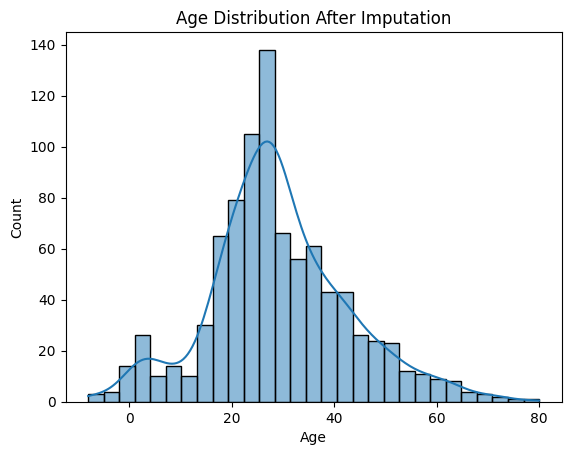

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the distribution of 'Age' before and after imputation
sns.histplot(train_data['Age'], kde=True)
plt.title('Age Distribution After Imputation')
plt.show()